<a href="https://colab.research.google.com/github/mahikajain20/LHL_LLM_Project/blob/main/notebooks/2-representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import transformers as tr
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import hamming_loss, f1_score
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import requests
import getpass
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
import joblib

In this notebook, the code is performing the following tasks:

-Loads the data

-Vectorizes the text data

-Trains and evaluates a Random Forest model

-Trains and evaluates a Logistic Regression model

-Provides detailed classification reports for both models

-Compares the F1 scores of both models with a bar chart

-Shows the most important features for the Logistic Regression model

-Shows and visualizes the most important features for the Random Forest model

Firstly, I will load the preprocessed data I saved in the previous notebook

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Load the data
ds_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_train_data.csv')
ds_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_test_data.csv')

In [13]:
print("Vectorizing text data...")
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(ds_train['text_processed'])
y_train = ds_train['label']
X_test = vectorizer.transform(ds_test['text_processed'])
y_test = ds_test['label']

Vectorizing text data...


**The provided code uses CountVectorizer to implement the Bag-of-Words model for text vectorization. It transforms the text data into numerical representations based on word counts, making it suitable for input into machine learning models. **

Count-Based Representation: The CountVectorizer converts text documents into a matrix of token counts, which is the essence of the Bag-of-Words model. Each document is represented as a vector of word counts, ignoring the order of words but capturing their frequency.

Vocabulary Building: The fit method of CountVectorizer builds a vocabulary from the text data, mapping each word to an index.


In [14]:
# Random Forest Model
print("Training Random Forest model...")
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

Training Random Forest model...


RandomForestClassifier()

In [15]:
# Evaluating Random Forest Model
print("Evaluating Random Forest model...")
y_pred_rf = rf_model.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf)
print("Random Forest F1 Score:", f1_rf)

Evaluating Random Forest model...
Random Forest F1 Score: 0.8518592803562116


In [16]:
# Create the model
log_reg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge

# Train the model
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
# Predict using test data
y_pred_log_reg = log_reg_model.predict(X_test)

# Calculate F1 score
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print("Logistic Regression F1 Score:", f1_log_reg)


Logistic Regression F1 Score: 0.8623890234059726


In [18]:
# Detailed Classification Report for both models
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     12500
           1       0.85      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     12500
           1       0.87      0.85      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



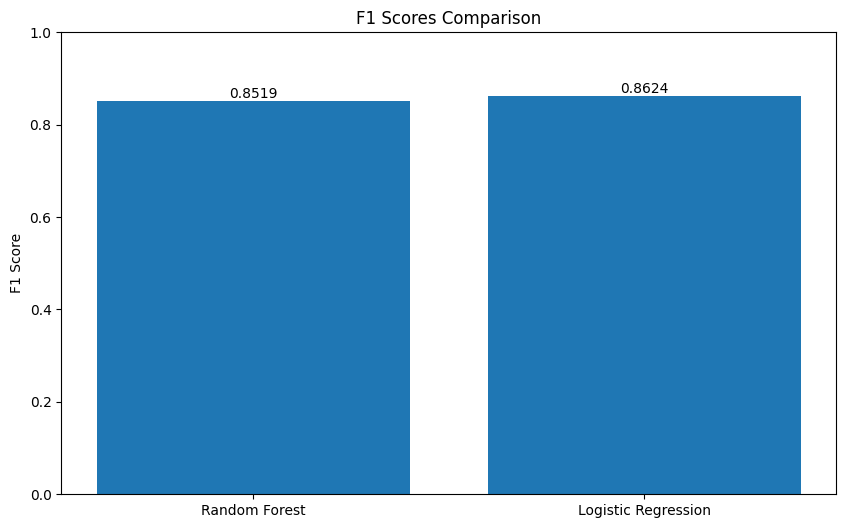

In [19]:
# Compare F1 Scores
models = ['Random Forest', 'Logistic Regression']
f1_scores = [f1_rf, f1_log_reg]

plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores)
plt.title('F1 Scores Comparison')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
for i, v in enumerate(f1_scores):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
plt.show()

Looking at the classification reports for the two datasets, it does not seem that there is a large difference between the performances of the two models. The logistic regression does perform slightly better (86% vs 85% accuracy) than the random forest model, potentially as logistic regression is well suited for binary classifications and this dataset has two labels.

Balance:

Both models show balanced performance across both classes, which is good. This means they're not biased towards one class.


Precision:

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
For Logistic Regression, it's slightly better at precisely identifying positive cases (class 1) with 0.87 compared to negative cases (class 0) with 0.86.


Recall:

Recall is the ratio of correctly predicted positive observations to all actual positive observations.
The Logistic Regression model is slightly better at recalling negative cases (0.87 for class 0) compared to positive cases (0.85 for class 1).


F1-Score:

F1-score is the harmonic mean of precision and recall, providing a single score that balances both metrics.
Both models have consistent F1-scores across classes, indicating balanced performance.

In [20]:
feature_names = vectorizer.get_feature_names_out()
coefficients = log_reg_model.coef_[0]

# Get the top 10 most positive and negative coefficients
top_positive = sorted(zip(coefficients, feature_names))[-10:]
top_negative = sorted(zip(coefficients, feature_names))[:10]

print("Top positive features:")
for coef, feat in top_positive:
    print(f"{feat}: {coef}")

print("\nTop negative features:")
for coef, feat in top_negative:
    print(f"{feat}: {coef}")

Top positive features:
driven: 1.1949844961985845
erotic: 1.2117818973477446
perfect: 1.2527441105565291
excellent: 1.263116855710406
superb: 1.2897609724594805
flawless: 1.300982033896656
carrey: 1.318005893126936
funniest: 1.390808140253725
wonderfully: 1.4029430075210452
refreshing: 1.5998619810721348

Top negative features:
disappointment: -2.2141544659525376
waste: -2.188679287162989
worst: -2.173644929712348
poorly: -1.8062471779330012
mstk: -1.662695369733789
lacks: -1.6450413755696605
awful: -1.6106134909863425
forgettable: -1.517372362700673
disappointing: -1.484484943842235
weak: -1.4013170527279573



Top 10 important features (Random Forest):
1. wonderful (0.003240)
2. boring (0.003657)
3. terrible (0.003784)
4. best (0.003804)
5. excellent (0.004370)
6. waste (0.004459)
7. awful (0.005227)
8. great (0.005568)
9. worst (0.008775)
10. bad (0.013480)


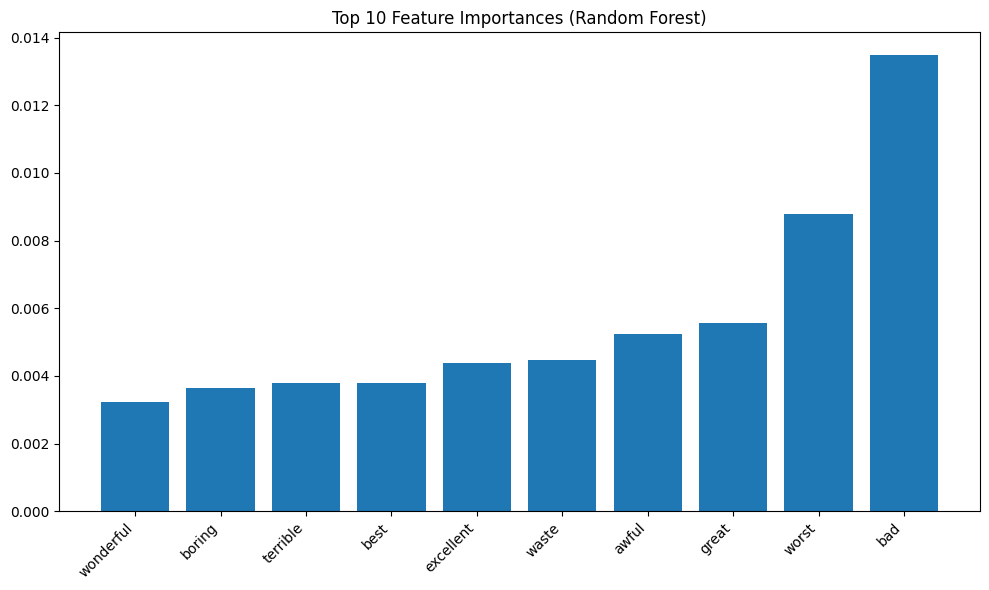

In [21]:
# Feature Importance for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

print("\nTop 10 important features (Random Forest):")
for f in range(10):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Visualize top features for Random Forest
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.bar(range(10), importances[indices])
plt.xticks(range(10), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Interpretation:**

Consistency: Both models identify similar important features. Words like "excellent," "waste," "awful," and "worst" appear in both lists, indicating their strong predictive power.

Sentiment Alignment: The features align well with intuitive sentiment. Positive words (e.g., "excellent," "wonderful") are associated with positive reviews, while negative words (e.g., "awful," "waste") are associated with negative reviews.

Logistic Regression Nuance: The logistic regression model captures more nuanced features. For example, "carrey" (likely referring to Jim Carrey) is a strong positive indicator, suggesting movies featuring this actor are often positively reviewed in this dataset.

Random Forest Balance: The Random Forest model seems to balance positive and negative indicators more evenly in its top features, including both "great" and "terrible" with similar importance.

Strength of Negativity: In both models, negative words seem to have a slightly stronger impact. For example, "disappointment" has the highest absolute coefficient in logistic regression, and "bad" has the highest importance in random forest.

Specific vs. General: Logistic regression picked up on more specific descriptors (e.g., "flawless," "erotic"), while random forest focused more on general sentiment words.

Misspellings: The logistic regression model picked up "mstk," which might be a common misspelling. This highlights the importance of text preprocessing in NLP tasks.

In [ ]:
#saving the model
joblib.dump(log_reg_model, 'log_reg_model.joblib')
joblib.dump(rf_model, 'rf_model.joblib')

This analysis is valuble for

Identifying potential biases (e.g., if certain actor names strongly influence predictions)

Guiding feature engineering or text preprocessing steps for future iterations

Providing interpretability for stakeholders about how the sentiment analysis works!